In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
data = pd.read_csv("LoanApprovalPrediction.csv")

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [ ]:
data[~data['LoanAmount'].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
594,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
595,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
596,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df=data.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


#### As Loan_ID is completely unique and not correlated with any of the other column, So we will drop it using .drop() function.

In [ ]:
# Dropping Loan_ID column
df.drop(['Loan_ID'],axis=1,inplace=True)

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
categorical_df = df.select_dtypes(include=['object', 'category'])

In [ ]:
categorical_df

,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,Graduate,No,Urban,Y
1,Male,Yes,Graduate,No,Rural,N
2,Male,Yes,Graduate,Yes,Urban,Y
3,Male,Yes,Not Graduate,No,Urban,Y
4,Male,No,Graduate,No,Urban,Y
...,...,...,...,...,...,...
593,Female,No,Graduate,No,Rural,Y
594,Male,Yes,Graduate,No,Rural,Y
595,Male,Yes,Graduate,No,Urban,Y
596,Male,Yes,Graduate,No,Urban,Y


In [ ]:
cat_df_columns = df.select_dtypes(include=['object', 'category']).columns

In [ ]:
cat_df_columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area',
       'Loan_Status'],
      dtype='object')

In [ ]:
numerical_df = df.select_dtypes(include=[np.number])

In [ ]:
numerical_df

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,5849,0.0,NaN,360.0,1.0
1,1.0,4583,1508.0,128.0,360.0,1.0
2,0.0,3000,0.0,66.0,360.0,1.0
3,0.0,2583,2358.0,120.0,360.0,1.0
4,0.0,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...
593,0.0,2900,0.0,71.0,360.0,1.0
594,3.0,4106,0.0,40.0,180.0,1.0
595,1.0,8072,240.0,253.0,360.0,1.0
596,2.0,7583,0.0,187.0,360.0,1.0


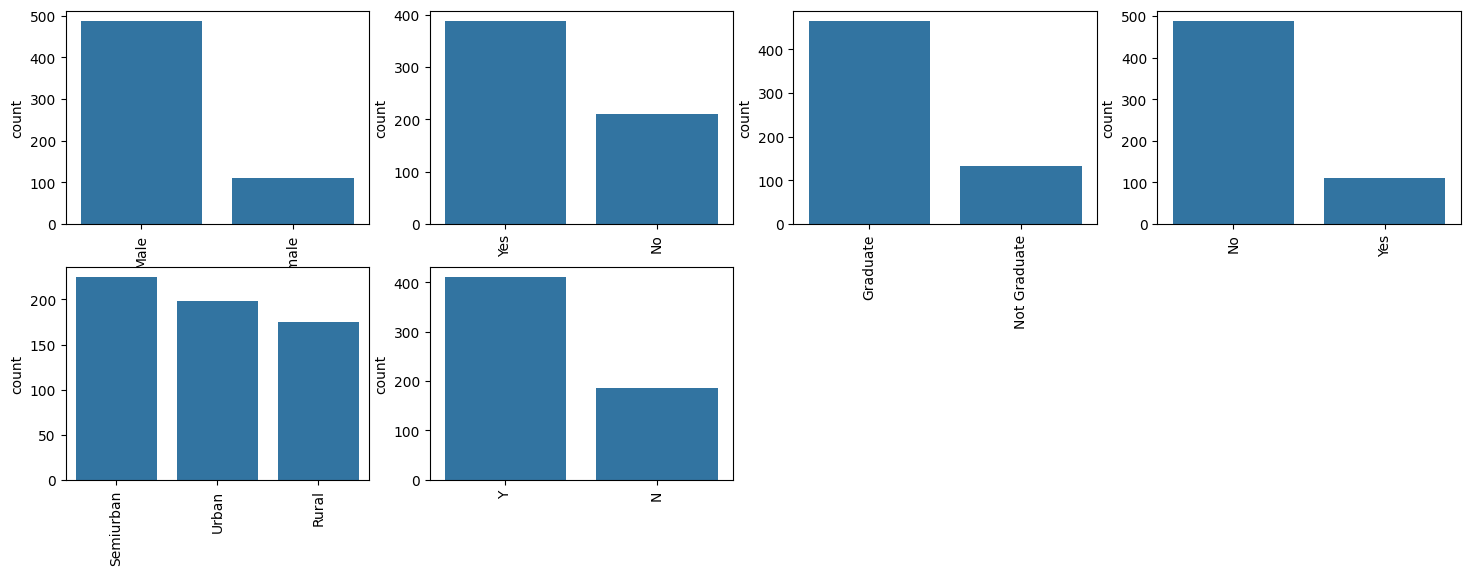

In [ ]:
plt.figure(figsize=(18,36))
index=1
for col in cat_df_columns:
  y=df[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  index +=1

In [ ]:
numerical_feat = df.select_dtypes(include=np.number).columns.tolist()
categorical_feat = df.select_dtypes(include='object').columns.tolist()

In [ ]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

In [ ]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinalencoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)) # handle_unknown to prevent errors for unseen categories
])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_feat),
        ('cat', categorical_transformer, categorical_feat)
    ])

In [ ]:
df_process = preprocessor.fit_transform(df)

In [ ]:
df_processed = pd.DataFrame(df_process, columns=numerical_feat+categorical_feat)

In [ ]:
df_processed

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,0.0,5849.0,0.0,144.968804,360.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0
1,1.0,4583.0,1508.0,128.000000,360.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.0,3000.0,0.0,66.000000,360.0,1.0,1.0,1.0,0.0,1.0,2.0,1.0
3,0.0,2583.0,2358.0,120.000000,360.0,1.0,1.0,1.0,1.0,0.0,2.0,1.0
4,0.0,6000.0,0.0,141.000000,360.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
593,0.0,2900.0,0.0,71.000000,360.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
594,3.0,4106.0,0.0,40.000000,180.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
595,1.0,8072.0,240.0,253.000000,360.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0
596,2.0,7583.0,0.0,187.000000,360.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0


In [ ]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dependents         598 non-null    float64
 1   ApplicantIncome    598 non-null    float64
 2   CoapplicantIncome  598 non-null    float64
 3   LoanAmount         598 non-null    float64
 4   Loan_Amount_Term   598 non-null    float64
 5   Credit_History     598 non-null    float64
 6   Gender             598 non-null    float64
 7   Married            598 non-null    float64
 8   Education          598 non-null    float64
 9   Self_Employed      598 non-null    float64
 10  Property_Area      598 non-null    float64
 11  Loan_Status        598 non-null    float64
dtypes: float64(12)
memory usage: 56.2 KB


<Axes: >

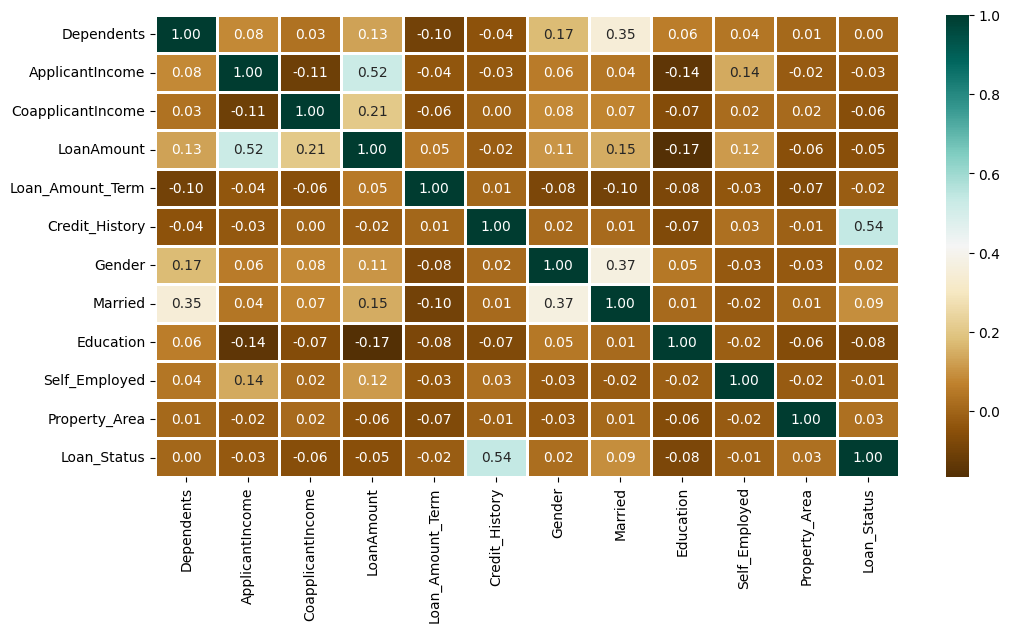

In [ ]:
plt.figure(figsize=(12,6))

sns.heatmap(df_processed.corr(),cmap='BrBG',fmt='.2f',
            linewidths=2,annot=True)

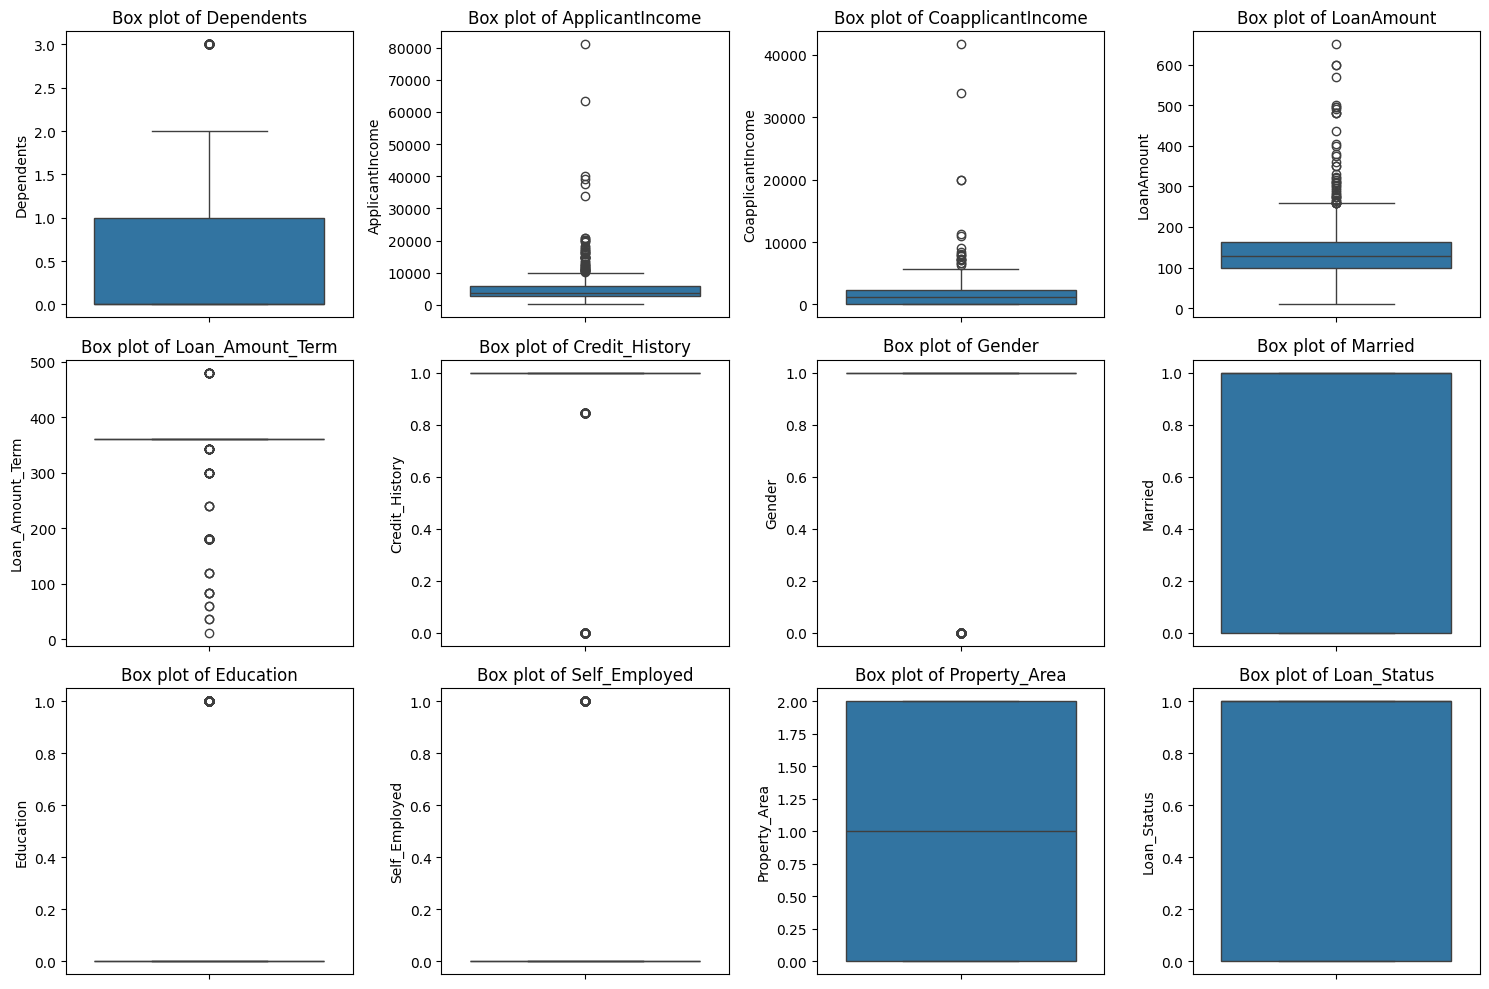

In [ ]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df_processed.columns):
    plt.subplot(3, 4, i + 1)  # Adjust subplot grid as needed
    sns.boxplot(y=df_processed[column])
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()

In [ ]:
Q1 = df_processed['LoanAmount'].quantile(0.25)
Q3 = df_processed['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_processed['LoanAmount'] = np.where(df_processed['LoanAmount'] < lower_bound, lower_bound, df_processed['LoanAmount'])
df_processed['LoanAmount'] = np.where(df_processed['LoanAmount'] > upper_bound, upper_bound, df_processed['LoanAmount'])


Outliers in 'LoanAmount' have been capped using IQR method.
New range for 'LoanAmount': [9.0, 258.75]


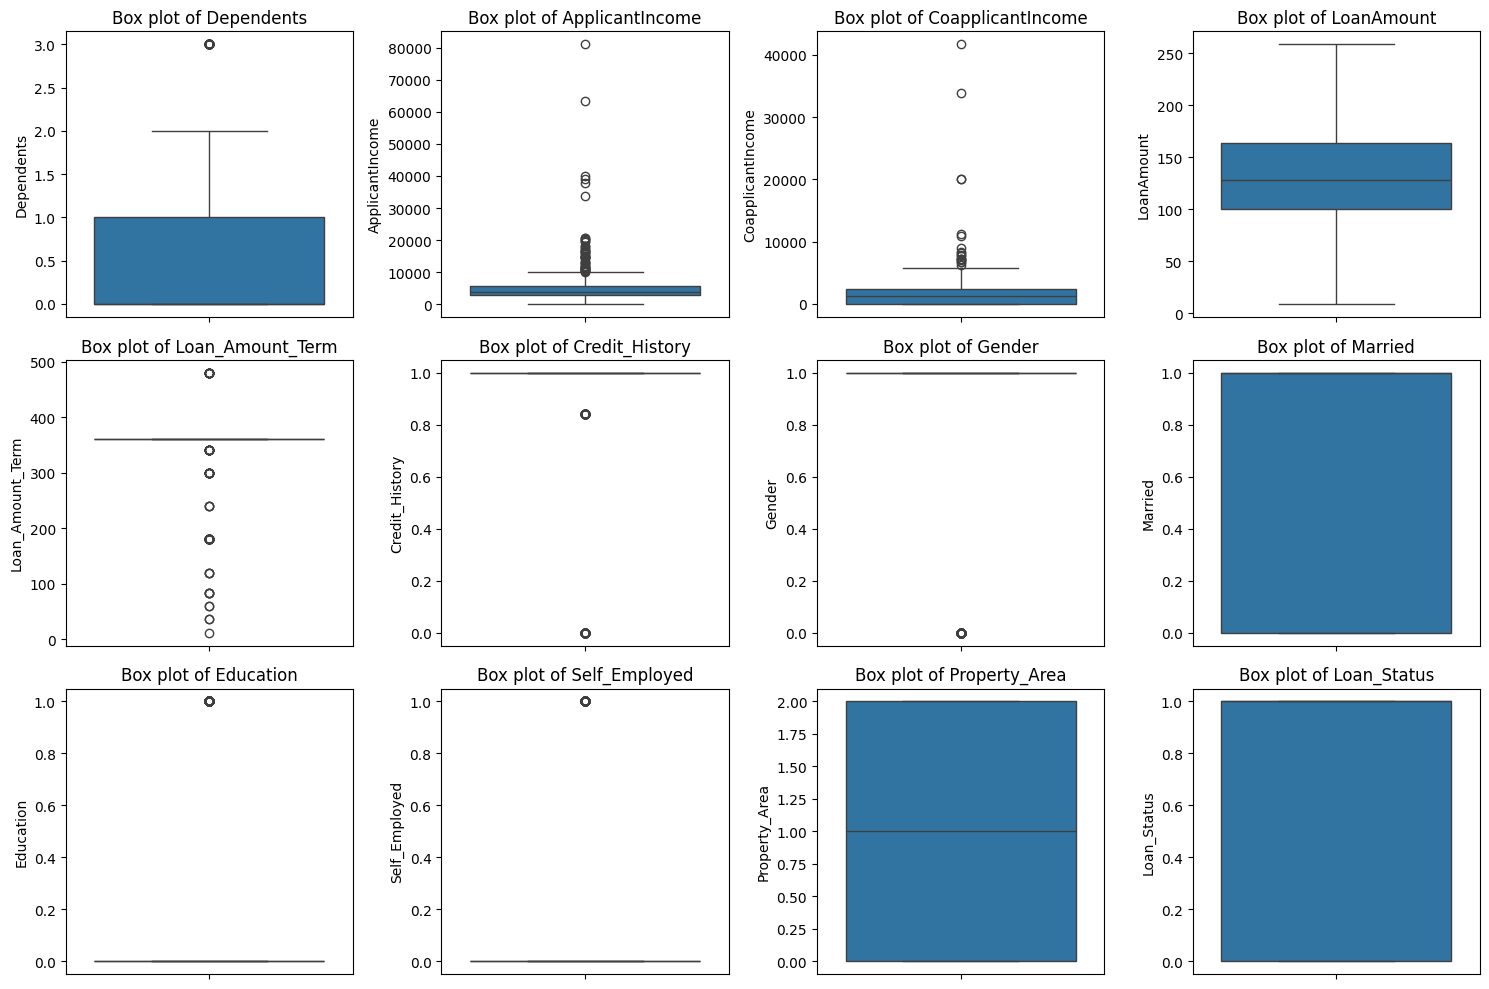

In [ ]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df_processed.columns):
    plt.subplot(3, 4, i + 1)  # Adjust subplot grid as needed
    sns.boxplot(y=df_processed[column])
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()

#### The above heatmap is showing the correlation between Loan Amount and ApplicantIncome. It also shows that Credit_History has a high impact on Loan_Status.

In [ ]:
from sklearn.model_selection import train_test_split

X = df_processed.drop(['Loan_Status'],axis=1)
Y = df_processed['Loan_Status']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.4,
                                                    random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((358, 11), (240, 11), (358,), (240,))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=5)
rfc = RandomForestClassifier(n_estimators = 7,
                             criterion = 'entropy',
                             random_state =7)
svc = SVC()
lc = LogisticRegression()

# making predictions on the training set
for clf in (rfc, knn, svc,lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_train)
    print("Accuracy score of ",
          clf.__class__.__name__,
          "=",100*metrics.accuracy_score(Y_train,
                                         Y_pred))

Accuracy score of  RandomForestClassifier = 98.32402234636871
Accuracy score of  KNeighborsClassifier = 71.22905027932961
Accuracy score of  SVC = 68.71508379888269
Accuracy score of  LogisticRegression = 79.05027932960894


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
for clf in (rfc, knn, svc,lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print("Accuracy score of ",
          clf.__class__.__name__,"=",
          100*metrics.accuracy_score(Y_test,
                                     Y_pred))

Accuracy score of  RandomForestClassifier = 79.16666666666666
Accuracy score of  KNeighborsClassifier = 63.74999999999999
Accuracy score of  SVC = 69.16666666666667
Accuracy score of  LogisticRegression = 81.25


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
